In [1]:
# rastermap algorithm
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline


U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_numpy.npy')
V=V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy')

In [2]:
model = mapping.Rastermap(n_components=1).fit(U)

nmin 150
0.008669853210449219
0.09342527389526367
0.09874534606933594
0.13439679145812988
(38, 40)
(70,)
1.0
time; iteration;  explained PC variance
0.24s     0        0.0391      2
0.36s    10        0.1558      4
0.50s    20        0.2201      8
0.63s    30        0.2951      18
0.76s    40        0.3240      28
0.88s    50        0.3509      38
1.01s    60        0.3588      38
1.13s   final      0.3593
1.14s upsampled    0.3593


[9437 2207 1643 ... 1870 2289 1293]
[[0.00000000e+00 1.05795213e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05534892e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05154141e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.60979742e+00 6.41810189e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.61619665e+00 2.89208671e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.61573519e+00 1.45480979e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


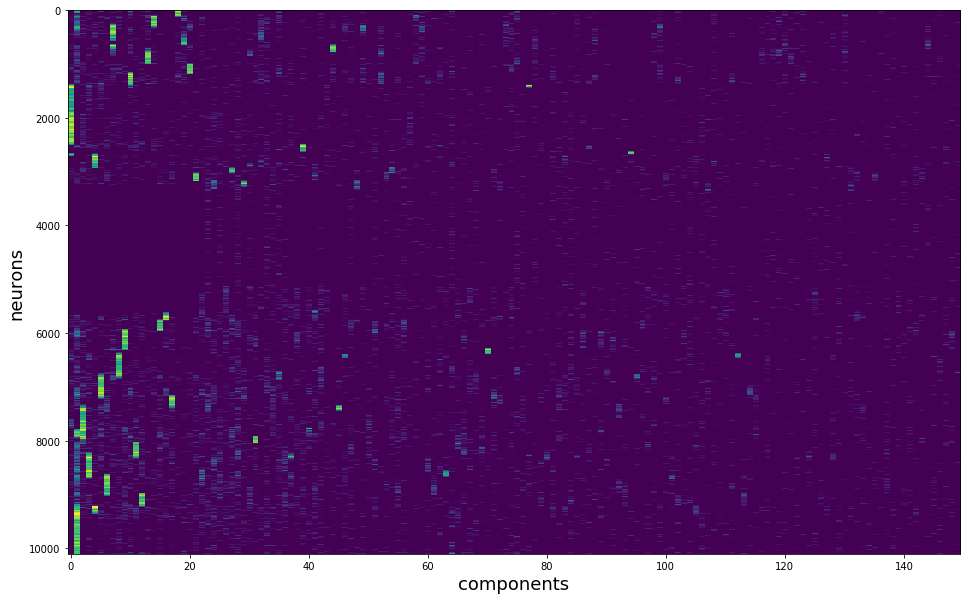

In [3]:
isort = np.argsort(model.embedding[:,0])
print(isort)
Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

In [4]:
model2 = mapping.Rastermap(n_components=1).fit(U.T)

nmin 150
0.008844614028930664
0.10379815101623535
0.11408400535583496
0.11512994766235352
(38, 40)
(70,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0618      2
0.01s    10        0.1260      4
0.02s    20        0.1932      8
0.03s    30        0.3175      18
0.04s    40        0.4079      28
0.06s    50        0.4838      38
0.07s    60        0.4839      38
0.07s   final      0.4841
0.08s upsampled    0.4841


In [5]:
isort2 = np.argsort(model2.embedding[:,0])
print(isort2.shape)

(150,)


In [6]:
print(U.shape)

(10103, 150)


In [7]:
print(U[:,isort2])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.64743572 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.7844463  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [8]:
#print(U[isort,isort2])
print(U.shape)
print(isort.shape)
print(isort2.shape)
U_=U[isort,:]
print(U_.shape)
U__=U_[:,isort2]
print(U__.shape)

(10103, 150)
(10103,)
(150,)
(10103, 150)
(10103, 150)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.09415418]
 [0.         0.         0.         ... 0.         0.         0.07069253]
 [0.         0.         0.         ... 0.         0.         0.05703063]]


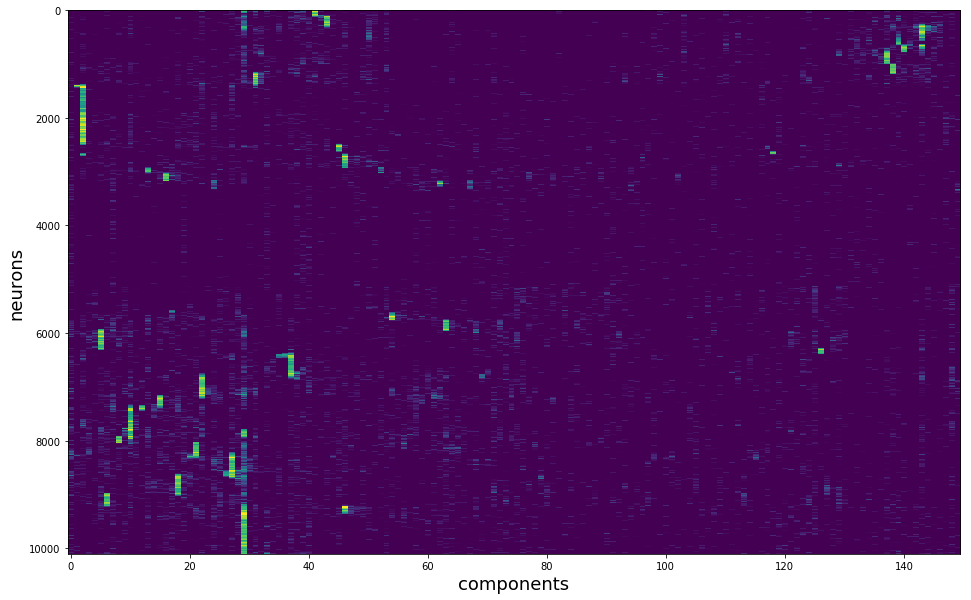

In [9]:
Sm = gaussian_filter1d(U__.T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,::-1]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()